In [23]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Import Data

In [24]:
inp_data_frame=pd.read_excel('Data.xlsx')
for i in inp_data_frame.keys():
    inp_data_frame[i]=inp_data_frame[i].astype(str)

# Clean Data

In [25]:
inp_data_frame=inp_data_frame.replace(u'\xa0',np.nan)
inp_data_frame=inp_data_frame.dropna()
inp_data_frame=inp_data_frame.reset_index(drop=True)
states_encoding={j:i for i,j in enumerate(inp_data_frame.State.unique().tolist())}
inp_data_frame['State']=inp_data_frame.State.map(states_encoding)

# Define Normalization Function

Formula used to normalize the data is below:

x[i]=x[i]/sqrt(sum(x*x))

so that all the values are on the same scale across the features, also the intercept and weights for each feature are on the same scale.


In [26]:
def normalize(x):
    y=x*x
    
    y=math.sqrt(y.sum())
    return(x/y)
    

# Normalizing the data and replacing missing data with mean value 

In [22]:
for i in inp_data_frame.keys():
    inp_data_frame[i]=inp_data_frame[i].astype(float)
    if(i!='State'):
        inp_data_frame[i]=inp_data_frame[i].replace(0,inp_data_frame[i].mean())
    inp_data_frame[i]=normalize( inp_data_frame[i])

# Split data into Train And Test

In [16]:
train, test = train_test_split(inp_data_frame, test_size=0.3)
Xtrain=train[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']]
Ytrain=train['Profit']
Xtest=test[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']]
Ytest=test['Profit']

X=train[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']]
Y=train['Profit']

# Used Ridge Regression with Cross validation value of 5

1.Used Ridge regression to avoid overfitting of data and normalize the bias variance tradeoff
2.Used Cross validation to avoid overfitting during model creation and selection with standard value of 5 folds


In [17]:
model=RidgeCV(alphas=(0.0001,0.001,0.01,0.1, 1.0, 10.0), fit_intercept=True, 
        normalize=False, 
        scoring=None,
        cv=5, 
        gcv_mode=None,
        store_cv_values=False)


# Fit Train Data

In [18]:
model.fit(Xtrain,
         Ytrain
         )

RidgeCV(alphas=(0.0001, 0.001, 0.01, 0.1, 1.0, 10.0), cv=5,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

# Check  Test Data and calculate r2 value

In [19]:
yhat=model.predict(Xtest)
y=np.array(Ytest)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.999997716183


# calculate the change in errors acroos train and validation for different values of alpha

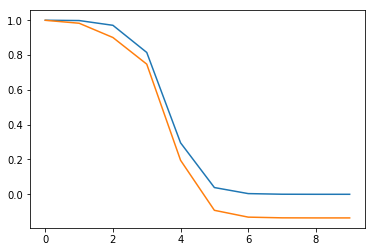

In [20]:
train_scores, valid_scores = validation_curve(Ridge(),X , Y,"alpha",
                                                  [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,100,1000,100000,10000000])
trainerror=[]
validerror=[]
for i,j in zip(train_scores,valid_scores):
    trainerror.append(i.mean())
    validerror.append(j.mean())
plt.plot(trainerror)
plt.plot(validerror)
plt.show()